In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [5]:
data=pd.read_csv("C:/Users/dell4/Downloads/healthcare-dataset-stroke-data.csv")

In [7]:
# Display the first few rows of the dataset to understand its structure
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
# Dropping rows with missing values in the 'bmi' column
data_cleaned = data.dropna(subset=['bmi'])

In [13]:
# Checking the new shape of the dataset after dropping missing values
data_cleaned.shape

(4909, 12)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoder = LabelEncoder()

In [27]:
# Encoding gender, ever_married, and Residence_type using LabelEncoder
data_cleaned.loc[:, 'gender'] = label_encoder.fit_transform(data_cleaned['gender'])
data_cleaned.loc[:, 'ever_married'] = label_encoder.fit_transform(data_cleaned['ever_married'])
data_cleaned.loc[:, 'Residence_type'] = label_encoder.fit_transform(data_cleaned['Residence_type'])

In [29]:
# Using one-hot encoding for 'work_type' and 'smoking_status' as they have multiple categories
data_encoded = pd.get_dummies(data_cleaned, columns=['work_type', 'smoking_status'], drop_first=True)

In [39]:
data_encoded.reset_index(drop=True, inplace=True)

In [41]:
# Displaying the first few rows of the encoded dataset
data_encoded.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,True,False,False
1,31112,1,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,True,False
2,60182,0,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False,False,True
3,1665,0,79.0,1,0,1,0,174.12,24.0,1,False,False,True,False,False,True,False
4,56669,1,81.0,0,0,1,1,186.21,29.0,1,False,True,False,False,True,False,False


In [ ]:
#Split data into train and test set and train logistic regression model, calculate accuracy

In [ ]:
#1 split the data

In [45]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_encoded.drop('stroke', axis=1)  # Features
y = data_encoded['stroke']               # Target

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#2 Scale or Normalize the features

In [47]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#3 Train the Logistic Regression Model

In [73]:
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression model with balanced class weights
log_reg = LogisticRegression(class_weight='balanced')

# Fit the model to the training data
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
#4 Evaluate the Model

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [77]:
# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

In [79]:
# Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       931
           1       0.15      0.86      0.26        51

    accuracy                           0.75       982
   macro avg       0.57      0.80      0.55       982
weighted avg       0.95      0.75      0.82       982



In [81]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75


In [83]:
# Display the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[689 242]
 [  7  44]]


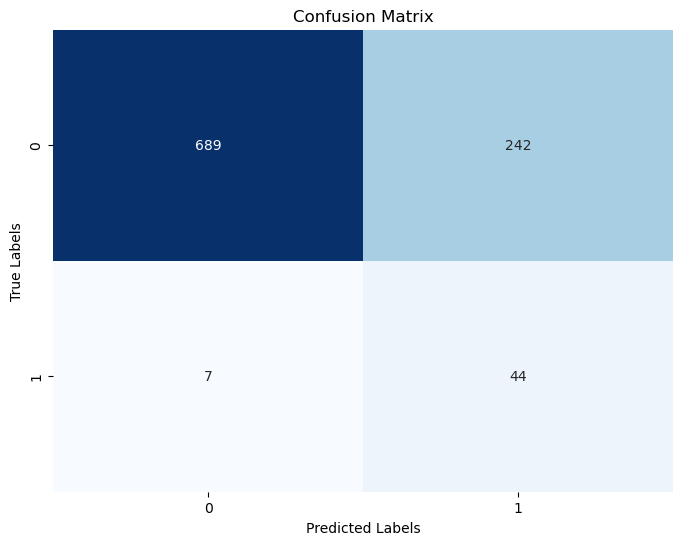

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [87]:
from sklearn.metrics import precision_score

# Calculate the precision score
precision = precision_score(y_test, y_pred, zero_division=0)
print(f'Precision Score: {precision:.2f}')


Precision Score: 0.15


In [89]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print(f'F1 Score: {f1:.2f}')

F1 Score: 0.26


In [91]:
print(y_train.value_counts())
print(y_test.value_counts())

stroke
0    3769
1     158
Name: count, dtype: int64
stroke
0    931
1     51
Name: count, dtype: int64


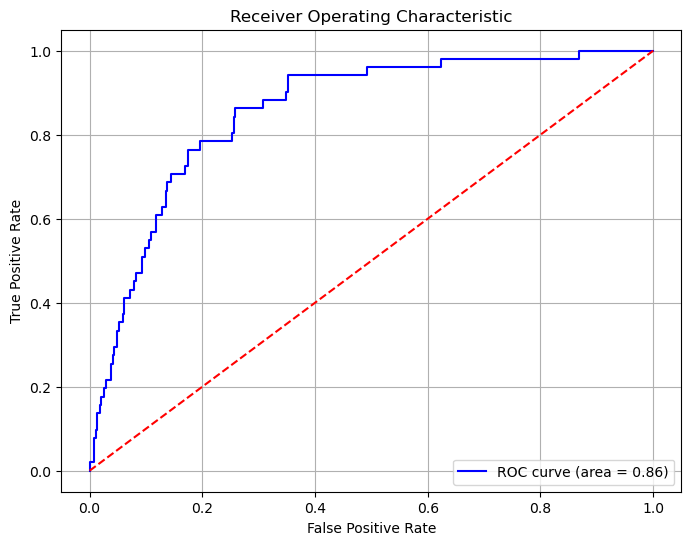

In [99]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [97]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.86


In [105]:
# Calculate Recall score
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, zero_division=0)
print(f'Recall: {recall:.2f}')

Recall: 0.86


In [111]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation and calculate accuracy
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Display cross-validation scores
print("Cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores for each fold: [0.72900763 0.71882952 0.75541401 0.74649682 0.72484076]
Mean cross-validation score: 0.7349177484967828


In [113]:
from sklearn.model_selection import GridSearchCV

# Initialize the logistic regression model
log_reg = LogisticRegression(solver='liblinear')  # Use solver that supports l1 regularization

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'class_weight': [None, 'balanced']  # Handle class imbalance
}

# Set up the grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')  # Change scoring as needed

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score:.2f}')

Best Parameters: {'C': 1, 'class_weight': None, 'penalty': 'l1'}
Best Cross-Validation Score: 0.96


In [125]:
print(f'Shape of y_test: {y_test.shape}')
print(f'Shape of y_pred: {y_pred.shape}')

Shape of y_test: (982,)
Shape of y_pred: (982,)


In [127]:
print(X_test_scaled.isnull().sum())  # For features
print(y_test.isnull().sum())  # For target variable

id                                0
gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64
0


In [129]:
print(f'Type of y_test: {type(y_test)}')
print(f'Type of y_pred: {type(y_pred)}')

Type of y_test: <class 'pandas.core.series.Series'>
Type of y_pred: <class 'numpy.ndarray'>


In [137]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Include both l1 and l2 penalties
    'class_weight': [None, 'balanced']
}

# Set up the grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize and fit the model with the best parameters
log_reg_tuned = LogisticRegression(solver='liblinear', **best_params)
log_reg_tuned.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg_tuned.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model with tuned hyperparameters: {accuracy:.2f}')


Accuracy of the model with tuned hyperparameters: 0.95
